In [1]:
from function_predictor import train, SimpleModel, make_points
import torch
import time

In [6]:
model = SimpleModel(2,1,{
    'prelstm' : [64],
    'lstm_cell_size' : 64,
    'postlstm' : [64, 32]
}).cuda()

In [14]:
model = torch.load('regressor0small')

In [8]:
opt = torch.optim.Adam(model.parameters(), lr=1e-5)

In [9]:
start = time.time()
train(100000, 128, model, opt)
print('Total time: ', time.time()-start)


Epsisode:  0  Loss:  tensor(0.2286, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([0.7090, 0.7158, 0.6236, 0.5990, 0.6029, 0.4202, 0.4837, 0.4175, 0.3889,
        0.4288, 0.3838, 0.3733, 0.3422, 0.3599, 0.3515, 0.3189, 0.2760, 0.3456,
        0.3212, 0.3260, 0.2893, 0.3027, 0.2856, 0.2879, 0.3192, 0.2916, 0.3078,
        0.3175, 0.2619, 0.2715, 0.2785, 0.2735, 0.2798, 0.2857, 0.2687, 0.2615,
        0.2776, 0.2773, 0.2575, 0.2603, 0.2644, 0.2550, 0.2717, 0.2492, 0.2588,
        0.2547, 0.2699, 0.2500, 0.2342], device='cuda:0')
Epsisode:  1000  Loss:  tensor(0.2240, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([0.8005, 0.6044, 0.5565, 0.5598, 0.4788, 0.5059, 0.3927, 0.4663, 0.4045,
        0.4483, 0.3741, 0.3854, 0.3426, 0.3321, 0.3235, 0.3387, 0.3049, 0.3433,
        0.3523, 0.3035, 0.3158, 0.2911, 0.2792, 0.2718, 0.2799, 0.2377, 0.2945,
        0.2621, 0.3159, 0.2630, 0.2803, 0.2879, 0.2660, 0.2957, 0.2482, 0.2686,
        0.2926, 0.2805, 0.2734, 0.2748, 0.2903, 0.2300, 0.2

KeyboardInterrupt: 

In [8]:
start = time.time()
train(500000, 128, model, opt)
print('Total time: ', time.time()-start)

Epsisode:  0  Loss:  tensor(0.9427, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([0.4187, 0.4664, 0.4501, 0.4313, 0.4113, 0.4580, 0.4220, 0.4618, 0.3941,
        0.4224, 0.4556, 0.4524, 0.4510, 0.4570, 0.4290, 0.4040, 0.4254, 0.4212,
        0.4720, 0.4891, 0.4337, 0.4490, 0.4558, 0.4546, 0.4253, 0.4622, 0.4495,
        0.4226, 0.4549, 0.4099, 0.4177, 0.4879, 0.4856, 0.4074, 0.4458, 0.4925,
        0.4277, 0.4396, 0.4685, 0.4661, 0.4713, 0.4184, 0.4507, 0.4260, 0.4820,
        0.4854, 0.4458, 0.3981, 0.4887], device='cuda:0')
Epsisode:  1000  Loss:  tensor(0.8056, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([0.4812, 0.5669, 0.5257, 0.5397, 0.5991, 0.6049, 0.6245, 0.5509, 0.6261,
        0.6223, 0.6003, 0.6285, 0.6266, 0.6264, 0.6377, 0.6711, 0.6584, 0.6015,
        0.6317, 0.6245, 0.6631, 0.6314, 0.6123, 0.6237, 0.6643, 0.6142, 0.6799,
        0.6630, 0.6383, 0.6477, 0.6075, 0.6546, 0.6784, 0.6198, 0.6207, 0.6688,
        0.6459, 0.6435, 0.6482, 0.6342, 0.6235, 0.6729, 0.6

In [9]:

#torch.save(model, 'regressor1')

In [14]:
#torch.save(model2, 'regressor0small')

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [3]:
gp = GaussianProcessRegressor(kernel=RBF(0.1), random_state=None, optimizer=None)

In [6]:
gp.fit([[0.5]], [[1]])

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=0.1), n_restarts_optimizer=0,
                         normalize_y=False, optimizer=None, random_state=None)

In [8]:
gp.predict([[0.4]], return_cov=True)

(array([[0.60653066]]), array([[0.63212056]]))

In [9]:
gp.predict([[0.4]])


array([[0.60653066]])

In [18]:
3+3


6

In [172]:
gp = GaussianProcessRegressor(kernel=RBF(0.1), random_state=None, optimizer=None)
target = torch.empty((49))
series = make_points(1)
pred = model(series).cpu()
series = series.cpu()
for i in range(49):
    gp.fit(series[:(i+1),0,:1], series[:(i+1),0,1:])
    target[i] = torch.tensor(gp.predict(series[i+1, :, :1]))
    if i == 0:
        print(gp.predict(series[i+1, :, :1]), target[i])
    

[[0.00165057]] tensor(0.0017)


In [173]:
real = series[1:, 0, 1]
pred = pred.squeeze()

In [174]:
target

tensor([ 1.6506e-03, -5.4619e-02, -3.0486e-02,  8.8408e-02,  4.5688e-01,
        -1.9568e-01, -4.4012e-03, -4.2725e-02, -3.8649e-01, -9.5194e-01,
         2.0720e-01,  2.4128e-01, -8.8911e-02, -2.1384e+00,  7.0430e-02,
        -3.0061e-01,  3.4515e+00, -9.5555e-02, -8.3143e-02,  4.6587e-02,
         1.5630e-01, -5.7796e-01,  1.4286e-01,  4.0056e-02, -2.0531e-02,
         2.9191e-01,  1.8244e+00, -1.0248e-01, -1.2780e-01,  6.9055e-01,
         1.6121e-01,  1.0118e+00, -2.8606e-01, -1.0932e-01, -2.1312e-01,
         2.3639e-01,  6.2169e-02,  2.6040e-01,  3.3183e-01, -1.0226e+00,
         2.5033e-01, -1.2803e-01,  2.9674e-01, -1.6244e-01, -2.5084e+00,
        -9.3321e-02,  1.4859e-01,  2.9771e-01, -1.3662e-01])

In [175]:
pred

tensor([ 0.0735, -0.2993,  0.1129,  0.0550,  0.1950,  0.2063, -0.6601, -0.4583,
         0.1824, -1.0970,  0.0243,  0.2294,  0.0446, -1.4785,  0.2263,  0.5703,
         0.1200, -0.0315,  0.0589,  0.3359,  0.2296, -0.7474,  0.2225,  0.4399,
        -0.0128,  0.4588,  0.7045,  0.3269, -0.3991,  0.9608,  0.0284,  1.0766,
         0.0076, -0.3893,  0.0890, -0.2272,  0.2468,  0.2514,  0.0988, -0.9099,
         0.1783, -0.3409,  0.2097,  0.2045, -1.6032, -0.1399,  0.0144,  0.2539,
         0.3294], grad_fn=<SqueezeBackward0>)

In [176]:
(target - pred)

tensor([-0.0719,  0.2446, -0.1434,  0.0334,  0.2619, -0.4019,  0.6557,  0.4156,
        -0.5688,  0.1450,  0.1829,  0.0119, -0.1335, -0.6599, -0.1558, -0.8709,
         3.3315, -0.0641, -0.1421, -0.2893, -0.0733,  0.1694, -0.0796, -0.3998,
        -0.0078, -0.1669,  1.1199, -0.4294,  0.2713, -0.2702,  0.1328, -0.0648,
        -0.2937,  0.2800, -0.3021,  0.4635, -0.1846,  0.0089,  0.2330, -0.1127,
         0.0720,  0.2129,  0.0871, -0.3669, -0.9052,  0.0466,  0.1342,  0.0438,
        -0.4661], grad_fn=<SubBackward0>)

In [177]:
series.squeeze()

tensor([[ 0.3059,  0.0855],
        [ 0.5868, -0.2493],
        [ 0.7615,  0.2624],
        [ 0.6647, -0.4779],
        [ 0.3132,  0.1264],
        [ 0.7898,  0.2620],
        [ 0.9981, -3.0465],
        [ 0.8210, -0.0761],
        [ 0.8190, -0.0457],
        [ 0.6389, -0.4534],
        [ 0.8792, -1.2863],
        [ 0.0740,  0.8376],
        [ 0.2634, -0.1047],
        [ 0.2666, -0.0964],
        [ 0.9054, -1.8482],
        [ 0.2244, -0.1205],
        [ 0.1215,  0.5711],
        [ 0.4736,  0.0472],
        [ 0.2669, -0.0953],
        [ 0.3930,  0.3233],
        [ 0.4764,  0.0356],
        [ 0.3187,  0.1527],
        [ 0.8483, -0.5969],
        [ 0.3166,  0.1418],
        [ 0.4753,  0.0402],
        [ 0.2858, -0.0175],
        [ 0.0461,  0.9751],
        [ 0.0087,  1.2143],
        [ 0.5308, -0.1236],
        [ 0.2532, -0.1304],
        [ 0.1016,  0.6952],
        [ 0.3203,  0.1604],
        [ 0.0393,  1.0118],
        [ 0.5966, -0.2825],
        [ 0.7188, -0.1184],
        [ 0.5751, -0

In [178]:
torch.nn.functional.mse_loss(pred, target)

tensor(0.3551, grad_fn=<MseLossBackward>)

In [179]:
torch.nn.functional.mse_loss(pred, real)


tensor(0.3353, grad_fn=<MseLossBackward>)

In [180]:
torch.nn.functional.mse_loss(target, real)


tensor(0.4621)

In [2]:
import matplotlib.pyplot as plt

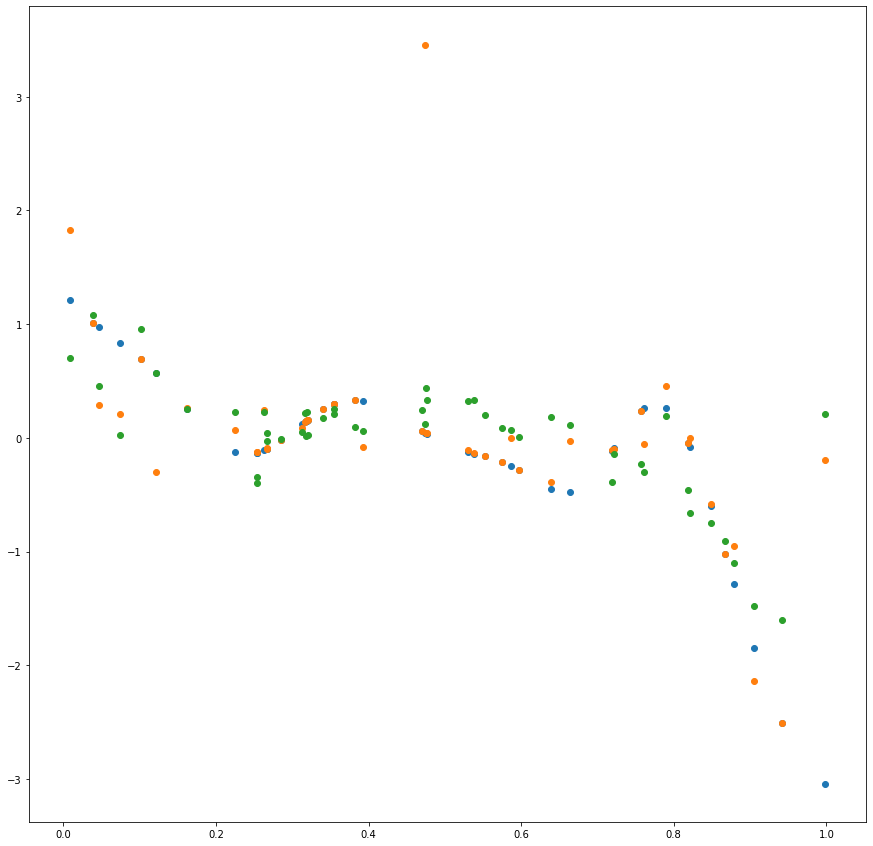

In [182]:
plt.figure(figsize=(15,15))
plt.scatter(series[1:, :, 0], series[1:, :, 1])
plt.scatter(series[1:, :, 0], target)
plt.scatter(series[1:, :, 0], pred.detach())


In [183]:
(real - pred)

tensor([-3.2280e-01,  5.6167e-01, -5.9075e-01,  7.1363e-02,  6.6960e-02,
        -3.2528e+00,  5.8403e-01,  4.1256e-01, -6.3579e-01, -1.8932e-01,
         8.1328e-01, -3.3411e-01, -1.4098e-01, -3.6969e-01, -3.4679e-01,
         7.9054e-04, -7.2851e-02, -6.3784e-02,  2.6440e-01, -3.0027e-01,
        -7.6956e-02,  1.5045e-01, -8.0640e-02, -3.9968e-01, -4.6764e-03,
         5.1632e-01,  5.0982e-01, -4.5052e-01,  2.6874e-01, -2.6562e-01,
         1.3200e-01, -6.4818e-02, -2.9016e-01,  2.7095e-01, -3.0155e-01,
         4.6607e-01, -1.8531e-01,  6.2432e-03,  2.3045e-01, -1.1331e-01,
         7.3587e-02,  2.1163e-01,  8.7073e-02, -3.6504e-01, -9.0285e-01,
         4.8505e-02,  1.3437e-01,  4.4371e-02, -4.6796e-01],
       grad_fn=<SubBackward0>)

In [184]:
(real - target)

tensor([-2.5091e-01,  3.1702e-01, -4.4738e-01,  3.7962e-02, -1.9491e-01,
        -2.8508e+00, -7.1693e-02, -3.0046e-03, -6.6941e-02, -3.3437e-01,
         6.3040e-01, -3.4597e-01, -7.4923e-03,  2.9023e-01, -1.9095e-01,
         8.7170e-01, -3.4043e+00,  3.0286e-04,  4.0647e-01, -1.0994e-02,
        -3.6222e-03, -1.8950e-02, -1.0182e-03,  1.3204e-04,  3.0774e-03,
         6.8317e-01, -6.1005e-01, -2.1110e-02, -2.5785e-03,  4.6075e-03,
        -7.6130e-04, -4.3392e-05,  3.5233e-03, -9.0694e-03,  5.3634e-04,
         2.5310e-03, -7.1862e-04, -2.7034e-03, -2.5291e-03, -5.7101e-04,
         1.5982e-03, -1.2238e-03, -4.0531e-06,  1.8889e-03,  2.3766e-03,
         1.9401e-03,  1.9269e-04,  5.3820e-04, -1.9069e-03])

In [1]:
from GPEnv import GPEnv
import matplotlib.pyplot as plt
import torch

In [2]:
env = GPEnv(51)
env.reset()

tensor([ 0.5000, -0.1537])

In [3]:
obs = torch.empty(50,2)
x = torch.rand((50))
for i in range(50):
    obs[i] = env.step(x[i])[0]

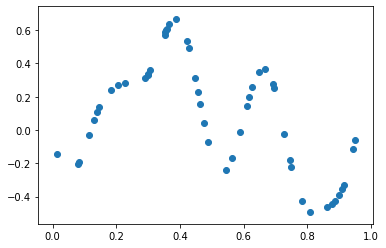

In [4]:
plt.scatter(obs[:, 0], obs[:, 1])

In [19]:
device = 'cuda'
a = torch.randn(500, 50, 50, device=device)
a = torch.matmul(a, a.transpose(2, 1))
b = torch.randn(500, 50, 1,  device=device)

In [22]:
teststart = time.time()
for i in range(100):
    u = torch.cholesky(a)
    sol1 = torch.cholesky_solve(b, u)
print(time.time()-teststart)

0.3501904010772705


In [23]:
teststart = time.time()
for i in range(100):
    sol2 = torch.solve(b, a)
print(time.time()-teststart)

0.8734338283538818


In [25]:
(sol1 - sol2[0]).max()

tensor(6.5416e+08, device='cuda:0')

In [32]:
sol1

tensor([[  19.2610,   68.5066,   54.5181,  ...,  183.7345,  133.3187,
          100.4788],
        [ -25.4470,  -68.7866,  -54.2304,  ..., -177.1624, -134.8337,
          -95.4951],
        [   5.2347,  -40.6447,  -39.1185,  ..., -123.6760,  -53.6913,
          -65.5489],
        ...,
        [  64.7870,  206.9637,  153.1485,  ...,  536.3083,  355.1414,
          285.2970],
        [ -36.7814, -145.2633, -111.6695,  ..., -389.7669, -253.6446,
         -209.2571],
        [  40.6676,  131.4725,   97.1506,  ...,  332.8507,  226.8318,
          178.6485]], device='cuda:0')

In [33]:
sol2[0]

tensor([[  18.9117,   67.4296,   53.7054,  ...,  180.8920,  131.3725,
           98.9645],
        [ -25.1184,  -67.7795,  -53.4713,  ..., -174.5055, -133.0178,
          -94.0810],
        [   5.4630,  -39.9585,  -38.6035,  ..., -121.8703,  -52.4354,
          -64.5854],
        ...,
        [  63.7429,  203.8178,  150.7794,  ...,  528.0238,  349.4529,
          280.8904],
        [ -36.0332, -142.9868, -109.9542,  ..., -383.7672, -249.5232,
         -206.0626],
        [  40.0220,  129.5259,   95.6855,  ...,  327.7244,  223.3148,
          175.9220]], device='cuda:0')